In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statistics_1 import *

In [4]:
df = pd.read_csv('./assets/brasileirao_serie_a.csv.gz')
df = df.dropna()
df = df.drop(df[df['faltas_mandante'] > 50].index)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 2319 to 7698
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  1700 non-null   int64  
 1   data                            1700 non-null   object 
 2   rodada                          1700 non-null   int64  
 3   estadio                         1700 non-null   object 
 4   arbitro                         1700 non-null   object 
 5   publico                         1700 non-null   float64
 6   publico_max                     1700 non-null   float64
 7   time_mandante                   1700 non-null   object 
 8   time_visitante                  1700 non-null   object 
 9   tecnico_mandante                1700 non-null   object 
 10  tecnico_visitante               1700 non-null   object 
 11  colocacao_mandante              1700 non-null   float64
 12  colocacao_visitante            

In [6]:
df.describe()

,ano_campeonato,rodada,publico,publico_max,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1.700000e+03,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,2020.753529,19.432353,14811.082941,44718.765294,10.499412,10.338235,1.963476e+07,1.918678e+07,68.211176,68.067529,...,14.020000,14.341176,2.826471,3.531765,1.536471,1.410588,12.793529,9.988824,5.995294,4.640000
std,1.577828,10.970645,16419.993677,20148.630062,5.772976,5.769790,1.885468e+07,1.835637e+07,93.075203,93.135891,...,4.448073,4.434741,1.859042,2.174182,1.430093,1.326466,6.205360,5.287429,2.841503,2.541669
min,2018.000000,1.000000,0.000000,5000.000000,1.000000,1.000000,5.600000e+02,6.350000e+02,20.400000,20.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,9.000000,0.000000,24584.000000,5.000000,5.000000,6.750000e+06,6.800000e+06,26.900000,26.700000,...,11.000000,11.000000,1.000000,2.000000,0.000000,0.000000,8.000000,6.000000,4.000000,3.000000
50%,2021.000000,20.000000,9463.500000,46465.500000,10.000000,10.000000,1.235000e+07,1.212500e+07,28.200000,28.000000,...,14.000000,14.000000,3.000000,3.000000,1.000000,1.000000,13.000000,10.000000,6.000000,4.000000
75%,2022.000000,28.250000,24868.500000,60326.000000,16.000000,15.000000,2.962500e+07,2.850000e+07,29.700000,29.725000,...,17.000000,17.000000,4.000000,5.000000,2.000000,2.000000,17.000000,13.000000,8.000000,6.000000
max,2023.000000,38.000000,69997.000000,82584.000000,20.000000,20.000000,1.005000e+08,9.600000e+07,324.000000,318.000000,...,30.000000,30.000000,12.000000,13.000000,9.000000,8.000000,37.000000,31.000000,21.000000,14.000000


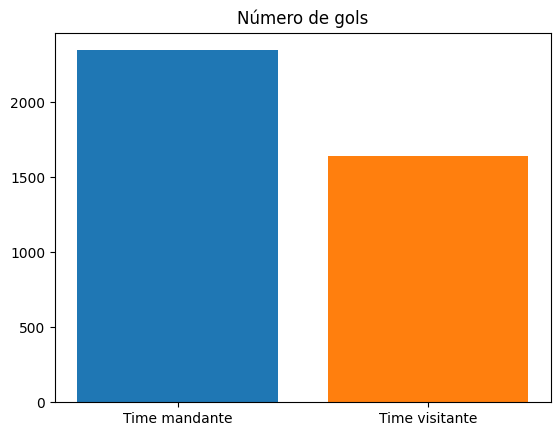

In [7]:
plt.title('Número de gols')
plt.bar('Time mandante', df['gols_mandante'].sum())
plt.bar('Time visitante', df['gols_visitante'].sum())
plt.show()

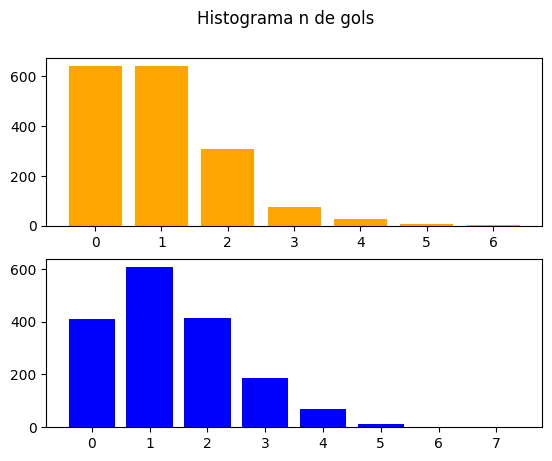

In [8]:
fig, axs = plt.subplots(2)
fig.suptitle('Histograma n de gols')

for k, v in Counter(df['gols_visitante']).items():
    axs[0].bar(k, v, color='orange')
for k, v in Counter(df['gols_mandante']).items():
    axs[1].bar(k, v, color='blue')

plt.show()

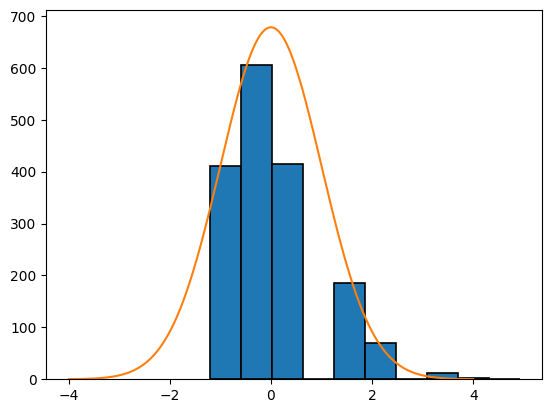

In [110]:
from scipy.stats import norm, zscore
import numpy as np


z = zscore(df['gols_mandante'])
mu, sigma = norm.fit(z)

x = np.linspace(-4, 4, 5000)
y = norm.pdf(x, mu, sigma)

plt.hist(z,edgecolor='black', linewidth=1.2)


plt.plot(x, y*len(z))
plt.show()

In [10]:
gols_df = df[df['gols_mandante'] == 4]

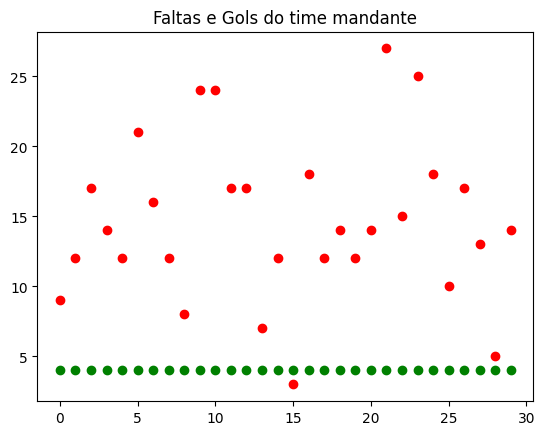

In [11]:
plt.title('Faltas e Gols do time mandante')
plt.scatter([x for x in range(30)], gols_df['faltas_mandante'][:30], color='red')
plt.scatter([x for x in range(30)], gols_df['gols_mandante'][:30], color='green')
plt.show()